In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

C:\Users\meghn\anaconda3\python meghna\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 20)
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Ecommerce Customers.unknown")

In [5]:
print(df.head())

                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    

In [6]:
print(df.columns)

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')


In [7]:
print(df.isnull().sum())

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


In [8]:
print(df.nunique())

Email                   500
Address                 500
Avatar                  138
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64


In [9]:
#fill missing values if any 
df['Avatar'].fillna("Unknown", inplace=True)

In [10]:
#customer with the max time spending 

max_time_customer = df[df['Time on App'] == df['Time on App'].max()]

max_spend_customer = df[df['Yearly Amount Spent'] == df['Yearly Amount Spent'].max()]


In [11]:
print("Customer with max time")
print(max_time_customer[['Email', 'Time on App', 'Yearly Amount Spent']])
print("")
print(max_spend_customer[['Email','Yearly Amount Spent', 'Length of Membership']])

Customer with max time
             Email  Time on App  Yearly Amount Spent
65  kyang@diaz.org    15.126994           765.518462

             Email  Yearly Amount Spent  Length of Membership
65  kyang@diaz.org           765.518462              5.377594


In [12]:
#Customer with the minimum time and spending
min_time_customer = df[df['Time on App'] == df['Time on App'].min()]
print(min_time_customer[['Email', 'Time on App', 'Yearly Amount Spent']])

                Email  Time on App  Yearly Amount Spent
309  dblair@gmail.com     8.508152           302.189548


In [13]:
#states with maximum time and spending

In [14]:
df.shape, df.size, df.columns

((500, 8),
 4000,
 Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
        'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
       dtype='object'))

In [15]:
df.info

<bound method DataFrame.info of                              Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ... 

In [16]:
#mean,max,min,std,quantities etc
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<Axes: >

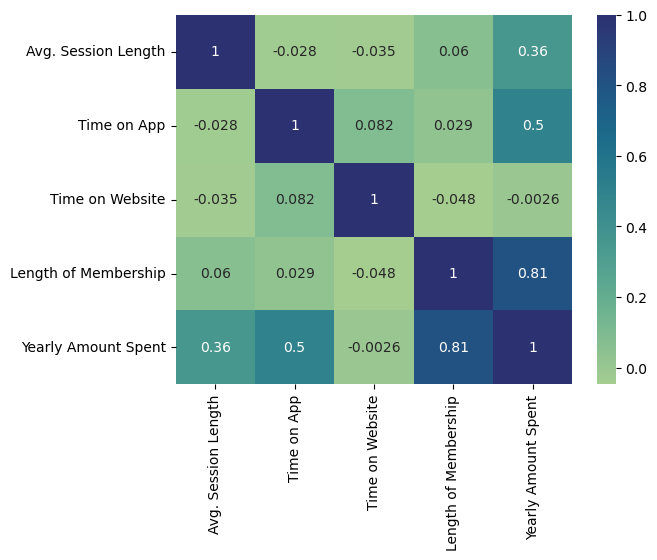

In [17]:
#correlation 
sns.heatmap(df[df.columns[3:]].corr(), cmap="crest",annot= True)

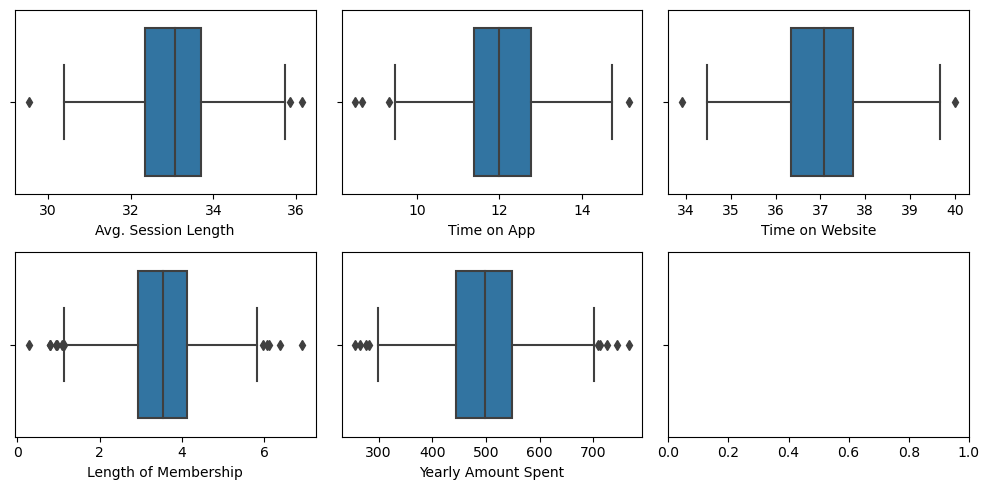

In [18]:
#Data Distribution Boxplots

fig, axes = plt.subplots(nrows = 2, ncols =3, figsize=(10, 5), sharey = True)


for index, column in enumerate(df.columns[3:]):
    sns.boxplot(data = df, x = column, ax = axes[int(index/3), index % 3])
    
plt.tight_layout()    
    

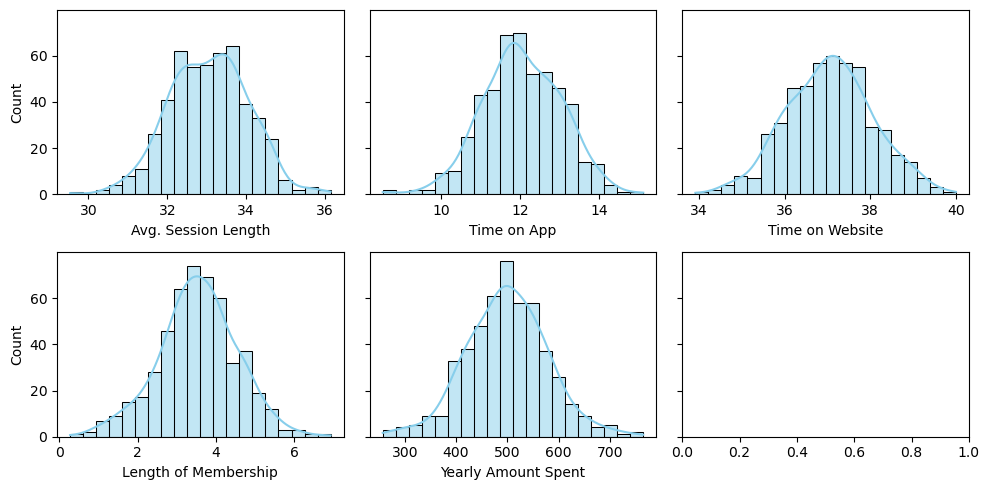

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5), sharey=True)

for index, column in enumerate(df.columns[3:]):
    sns.histplot(data=df, x=column, ax=axes[int(index/3), index % 3], kde=True, bins=20, color='skyblue')

plt.tight_layout()
plt.show()


Nan values: 0
Null values: 0


<Axes: >

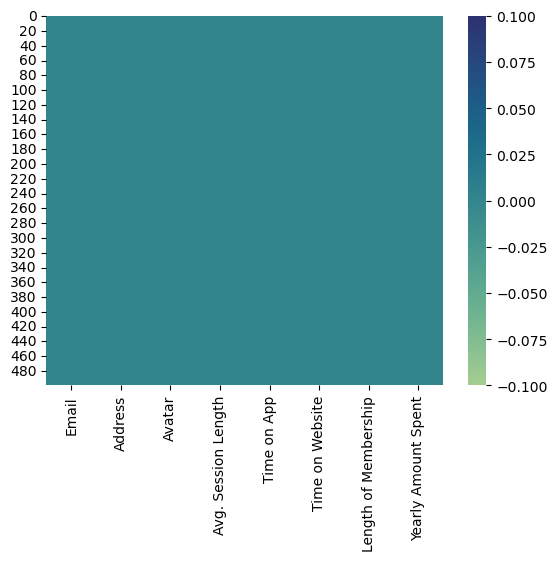

In [20]:
print(f"Nan values: {df.isna().sum(axis =1).sum()}")
      
print(f"Null values: {df.isnull().sum(axis=1).sum()}")
      
sns.heatmap (df.isnull()* df.isna(), cmap = "crest")      

In [21]:
# Total time spent on app and website
df['Total Time'] = df['Time on App'] + df['Time on Website']

# Extract state abbreviation from the address
df['State'] = df['Address'].str.extract(r', ([A-Z]{2}) ')

# Display a preview to confirm
print(df[['Address', 'State', 'Total Time']].head())


                                             Address State  Total Time
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605    MI   52.233319
1     4547 Archer Common\nDiazchester, CA 06566-8576    CA   48.378420
2  24645 Valerie Unions Suite 582\nCobbborough, D...    DC   48.440875
3   1414 David Throughway\nPort Jason, OH 22070-1220    OH   50.438796
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...    PR   50.331842


In [22]:
# Extract email domain (e.g., gmail.com, hotmail.com)
df['Email Domain'] = df['Email'].str.split('@').str[1]

# Count occurrences of each email domain
email_counts = df['Email Domain'].value_counts()

# Optional: show email counts and state counts side by side
print("📧 Email Domain Counts:")
print(email_counts)

print("\n📍 State Counts:")
print(df['State'].value_counts())


📧 Email Domain Counts:
Email Domain
gmail.com              87
hotmail.com            87
yahoo.com              76
jackson.com             2
barber.com              2
                       ..
salinas.biz             1
carson-hansen.com       1
scott.com               1
bennett-branch.info     1
davidson.com            1
Name: count, Length: 244, dtype: int64

📍 State Counts:
State
MO    13
DE    13
SC    13
VT    12
OR    12
      ..
MP     5
UT     5
TN     5
WA     4
ID     3
Name: count, Length: 59, dtype: int64


In [23]:
#Customer with max time spending
top_spender = df.loc[df['Yearly Amount Spent'].idxmax(), ['Email', 'Yearly Amount Spent', 'Time on App', 'Time on Website']]
print("Highest Spender:")
display(top_spender)

Highest Spender:


Email                  kyang@diaz.org
Yearly Amount Spent        765.518462
Time on App                 15.126994
Time on Website             37.157624
Name: 65, dtype: object

In [24]:
#Customers with min time and spending
less_spender =df.loc[df['Yearly Amount Spent'].idxmin(),['Email','Yearly Amount Spent','Time on App','Time on Website']]
print("Least Spender: ")
display(less_spender)

Least Spender: 


Email                  alexandra26@summers-davis.com
Yearly Amount Spent                       256.670582
Time on App                                10.256549
Time on Website                            36.143908
Name: 225, dtype: object

In [25]:
#Customer with max time spending
s=df.select_dtypes(np.number).idxmax()
pd.Series(data=df.loc[s]['Email'].values,index=s.index)

Avg. Session Length            nathan86@hotmail.com
Time on App                          kyang@diaz.org
Time on Website         davisrobert@hicks-smith.com
Length of Membership               asilva@yahoo.com
Yearly Amount Spent                  kyang@diaz.org
Total Time                       pkline@hotmail.com
dtype: object

In [26]:
#Customers with min time and spending
s=df.select_dtypes(np.number).idxmin()
pd.Series(data=df.loc[s]['Email'].values,index=s.index)

Avg. Session Length                 knelson@gmail.com
Time on App                          dblair@gmail.com
Time on Website                      asilva@yahoo.com
Length of Membership           sharongraves@yahoo.com
Yearly Amount Spent     alexandra26@summers-davis.com
Total Time                           dblair@gmail.com
dtype: object

In [27]:
# States with the max time and spending
df.groupby(by='State').sum().idxmax()

Email                   MP
Address                 OR
Avatar                  ID
Avg. Session Length     DE
Time on App             MO
Time on Website         MO
Length of Membership    SC
Yearly Amount Spent     SC
Total Time              MO
Email Domain            WV
dtype: object

In [28]:
# States with the min time and spending
df.groupby(by='State').sum().idxmin()

Email                   OK
Address                 AL
Avatar                  WI
Avg. Session Length     ID
Time on App             ID
Time on Website         ID
Length of Membership    ID
Yearly Amount Spent     ID
Total Time              ID
Email Domain            AZ
dtype: object

In [29]:
# Differences between customers over spending time and money
df.describe().loc['std',:]

Avg. Session Length      0.992563
Time on App              0.994216
Time on Website          1.010489
Length of Membership     0.999278
Yearly Amount Spent     79.314782
Total Time               1.474820
Name: std, dtype: float64

In [30]:
df.describe().loc['mean',:]

Avg. Session Length      33.053194
Time on App              12.052488
Time on Website          37.060445
Length of Membership      3.533462
Yearly Amount Spent     499.314038
Total Time               49.112933
Name: mean, dtype: float64

In [31]:
#differences between customer over spending time and money : coefficient of variation
df.describe().loc['std',:]/df.describe().loc['mean',:]*100

Avg. Session Length      3.002927
Time on App              8.249049
Time on Website          2.726597
Length of Membership    28.280412
Yearly Amount Spent     15.884749
Total Time               3.002916
dtype: float64

In [32]:
#Differences between state over spending time and money
state_means=df[df.columns[3:-1]].groupby(by='State').mean().std(axis=0)
state_means

Avg. Session Length      0.410814
Time on App              0.342837
Time on Website          0.362703
Length of Membership     0.422517
Yearly Amount Spent     31.144402
Total Time               0.546679
dtype: float64

In [33]:
#Differences between state over spending time and money: coefficient of variation
state_var=state_means.std()/state_means.mean() *100

In [34]:
state_var

226.5046836762114

In [35]:
state_var2=state_means/df[df.columns[3:-1]].groupby(by='State').mean().mean(axis=0)*100

In [36]:
state_var2

Avg. Session Length      1.243615
Time on App              2.841438
Time on Website          0.979353
Length of Membership    11.952333
Yearly Amount Spent      6.233234
Total Time               1.113386
dtype: float64

In [37]:
#top 5 states spending on App
top_spender=df.groupby('State').sum().sort_values(by='Time on App',ascending=False)['Time on App'].head()

In [38]:
top_spender

State
MO    156.271069
DE    154.928321
SC    154.071771
VT    147.647950
OR    141.884683
Name: Time on App, dtype: float64

In [39]:
#top 5 customerz spending time on App
top_customers_app_time = df.sort_values(by='Time on App', ascending=False)[['Email', 'Time on App', 'State']].head(5)



In [40]:
top_customers_app_time

,Email,Time on App,State
65,kyang@diaz.org,15.126994,IN
18,alejandro75@hotmail.com,14.715388,PW
260,george02@hotmail.com,14.426491,RI
286,bhill@pierce-kane.info,14.325655,OK
340,vancealicia@hotmail.com,14.288015,NH


In [41]:
df.isnull().sum()

Email                    0
Address                  0
Avatar                   0
Avg. Session Length      0
Time on App              0
Time on Website          0
Length of Membership     0
Yearly Amount Spent      0
Total Time               0
State                   46
Email Domain             0
dtype: int64

In [42]:
X=df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y=df[['Yearly Amount Spent']]


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
249,33.780157,11.917636,36.844734,3.634996
433,34.278248,11.822722,36.308545,2.117383
19,32.617856,13.989593,37.190504,4.064549
322,33.264632,10.732131,36.145792,4.086566
332,33.144234,11.737041,37.935189,2.190132
...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823
270,34.006489,12.956277,38.655095,3.275734
348,31.812483,10.886921,34.897828,3.128639
435,32.259973,14.132893,37.023479,3.762070


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [47]:
y_pred = lr.predict(X_test)


In [48]:
from sklearn.metrics import r2_score

y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)



In [49]:
r2



0.9778130629184126

In [50]:
X=df[['Length of Membership','Time on App']]
y=df[['Yearly Amount Spent']]

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [54]:
y_pred = lr.predict(X_test)


In [55]:
from sklearn.metrics import r2_score

y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)



In [56]:
r2

0.8378856569356044

In [57]:

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [58]:
median_spending = df['Yearly Amount Spent'].median()
df['Spending_Class'] = df['Yearly Amount Spent'].apply(lambda x: 1 if x > median_spending else 0)

In [59]:
X=df[[ 'Time on App', 'Length of Membership']]
y=df[['Spending_Class']]

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [61]:
clf=LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [62]:
acc=accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression Model accuracy: {acc:.2f}%")

Logistic Regression Model accuracy: 89.00%


In [63]:
import joblib